ссылка на ноутбук в колаб: https://colab.research.google.com/drive/14r-yLuuoMyWm2bPxCuxAC4xlP2JJmuxV?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Работа с нерепрезентативными данными

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tixonsit/mmdad_materials/master/datasets_14872_228180_Admission_Predict_Ver1.1.csv')
del df['Serial No.']

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
len(df)

500

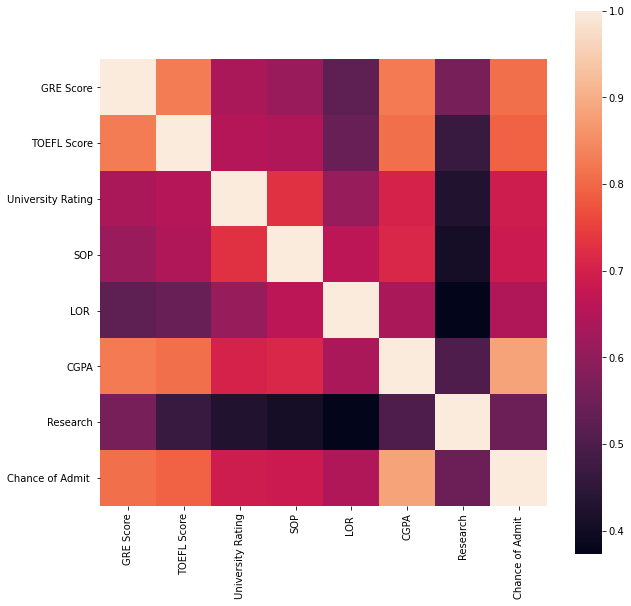

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), square=True)
plt.show()

In [ ]:
# перемешка
df = df.sample(frac=1).reset_index(drop=True)
# train test split
df_train = df[:400]
df_test = df[400:]
# среднее и стандартное отклонение
mean = df_train.mean(axis=0)
std = df_test.std(axis=0)
# 0 мат ожидание и 1 дисперсию
df_train = (df_train - mean)/std
X_train = df_train.drop(columns=['Chance of Admit ']).values
y_train = df_train['Chance of Admit '].values
df_test = (df_test - mean)/std
X_test = df_test.drop(columns=['Chance of Admit ']).values
y_test = df_test['Chance of Admit '].values

In [ ]:
X_train[:5]

array([[ 0.47245162,  0.46988529, -0.08528499,  0.65669367,  1.73504704,
         0.13555769,  0.90530038],
       [-0.20581001, -1.31860543,  0.76756487,  0.15540079,  1.17354314,
         0.28617734,  0.90530038],
       [ 1.9985403 ,  2.09578594,  0.76756487,  1.65927942,  1.73504704,
         1.57481214,  0.90530038],
       [ 0.47245162,  0.46988529, -0.08528499,  0.15540079, -1.07247244,
         0.18576424,  0.90530038],
       [ 0.89636514, -0.5056551 ,  1.62041473, -0.34589208,  0.05053535,
         0.47026802,  0.90530038]])

## Нерепрезентативность данных

### Разная перемешка

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [ ]:
# массив результатов
r2_shuffles = []
# проверим, зависит ли изначальная перемешка от результата
for i in range(20):
    # перемешка
    df = df.sample(frac=1).reset_index(drop=True)
    # train test split
    df_train = df[:400]
    df_test = df[400:]
    # среднее и стандартное отклонение
    mean = df_train.mean(axis=0)
    std = df_train.std(axis=0)
    # 0 мат ожидание и 1 дисперсию
    df_train = (df_train - mean)/std
    X_train = df_train.drop(columns=['Chance of Admit ']).values
    y_train = df_train['Chance of Admit '].values
    df_test = (df_test - mean)/std
    X_test = df_test.drop(columns=['Chance of Admit ']).values
    y_test = df_test['Chance of Admit '].values

    alg = Ridge()
    alg.fit(X_train, y_train)
    print(f'Итерация {i+1} | R^2 = ', r2_score(y_test, alg.predict(X_test)))

    r2_shuffles.append(r2_score(y_test, alg.predict(X_test)))

Итерация 1 | R^2 =  0.8618713386238145
Итерация 2 | R^2 =  0.8523990506417432
Итерация 3 | R^2 =  0.7929293618117262
Итерация 4 | R^2 =  0.7817039185810469
Итерация 5 | R^2 =  0.7908245279386232
Итерация 6 | R^2 =  0.8253184565151146
Итерация 7 | R^2 =  0.811006849978834
Итерация 8 | R^2 =  0.8328223109657988
Итерация 9 | R^2 =  0.7801653152356409
Итерация 10 | R^2 =  0.80319382685625
Итерация 11 | R^2 =  0.8297333958953841
Итерация 12 | R^2 =  0.8058086126455303
Итерация 13 | R^2 =  0.7221720626259716
Итерация 14 | R^2 =  0.8056904753377147
Итерация 15 | R^2 =  0.8400909192961801
Итерация 16 | R^2 =  0.8240075795001185
Итерация 17 | R^2 =  0.7662071238372943
Итерация 18 | R^2 =  0.7940477544919815
Итерация 19 | R^2 =  0.8239136744038666
Итерация 20 | R^2 =  0.8466913351600241


{'boxes': [<matplotlib.lines.Line2D at 0x7f44bc59a9e8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f44bc5ad438>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f44bc5adeb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f44bc5adb38>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f44bc59acf8>,
  <matplotlib.lines.Line2D at 0x7f44bc5ad0b8>]}

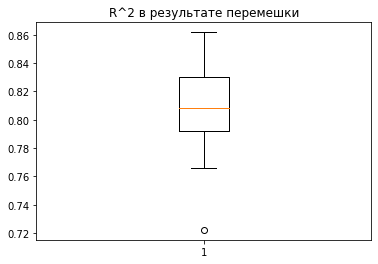

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('R^2 в результате перемешки')
ax1.boxplot(r2_shuffles)

Как еще можно обнаружить, что данных слишком мало? Можно посмотреть на кривые обучения.

Кроме этого попробуем улучшить картину путем создания новых признаков (например, полиномиальных).

### Кривые обучения

Изменяем размер имеющейся обучающей выборки и смотрим, как качество решения задачи зависит от объема данных, на котором мы обучали модель.Такой подход называется кривыми обучения (sklearn.model_selection.learning_curve).

Алгоритм выполняет перекрестную проверку тренировочных и тестовых показателей для разных размеров учебных наборов. Генератор перекрестной проверки разделяет весь набор данных k раз в данных обучения и теста. Подмножества обучающего набора с различными размерами будут использоваться для обучения оценщика, а для каждого размера обучающего подмножества и набора тестов будут вычисляться баллы. После этого результаты будут усреднены по всем k прогонам для каждого размера подмножества тренировки. 

Таким образом в результате обучения у нас получится значения метрики качества по y и размер выборки по x. На них будет отображены кривые по кросс валидации и обучению.

In [ ]:
# отобразим данные и средние значения кривых между ними (так как берем k фолдов)
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor=lines[0].get_color(), alpha=0.2)

In [ ]:
np.linspace(0.1, 0.9, 9)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

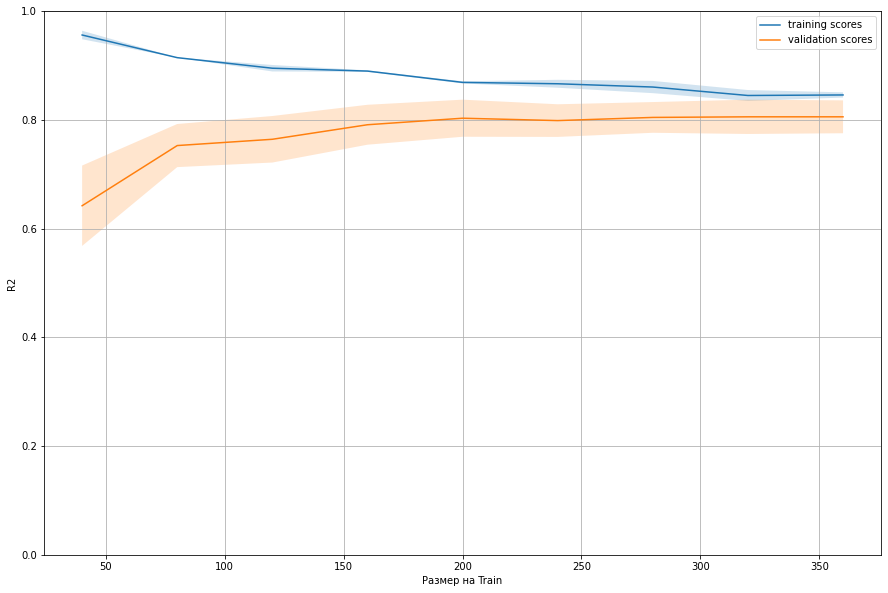

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# перемешка
df = df.sample(frac=1).reset_index(drop=True)
# train test split
df_train = df[:400]
df_test = df[400:]
# среднее и стандартное отклонение
mean = df.mean(axis=0)
std = df.std(axis=0)
# 0 мат ожидание и 1 дисперсию
df_train = (df_train - mean)/std
X_train = df_train.drop(columns=['Chance of Admit ']).values
y_train = df_train['Chance of Admit '].values
df_test = (df_test - mean)/std
X_test = df_test.drop(columns=['Chance of Admit ']).values
y_test = df_test['Chance of Admit '].values

pipe = Pipeline([('scaler', StandardScaler()), # нормализуем
                       ('poly', PolynomialFeatures(degree=2)), # создадим полиномиальных признаков (степень 2)
                       ('alg', Ridge())]) # все та же линейная с ridge регуляризация

N_train, val_train, val_test = learning_curve(pipe,
                                              df.drop(columns=['Chance of Admit ']).values, # X
                                              df['Chance of Admit '].values, # y
                                              train_sizes = np.linspace(0.1, 0.9, 9), # переменный размер обучающей выборки
                                              cv=5, # 5 фолдов кросс вал
                                              scoring='r2') # R2
from matplotlib.pyplot import figure, ylim
figure(figsize=(15, 10))
plt.grid()
ylim(0, 1)
plot_with_err(N_train, val_train, label='training scores')
plot_with_err(N_train, val_test, label='validation scores')
plt.xlabel('Размер на Train')
plt.ylabel('R2')
plt.legend()

* Если две кривые распологаются близко, и обе ошибки велики, — это признак недообучения
* Если две кривые далеко друг от друга — это показатель переобучения, данные нерепрезентативны
* Если кривые еще не сошлись, добавление новых данных может улучшить результат
* Если две кривые далеко друг от друга, — это показатель переобучения


# Задача классификации

## Аугментация

Мы попробовали аугментировать с помощью sklearn

In [ ]:
# попробуем создать новые данные на основе пространства признаков
#!pip install -U imbalanced-learn

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
import seaborn as sns

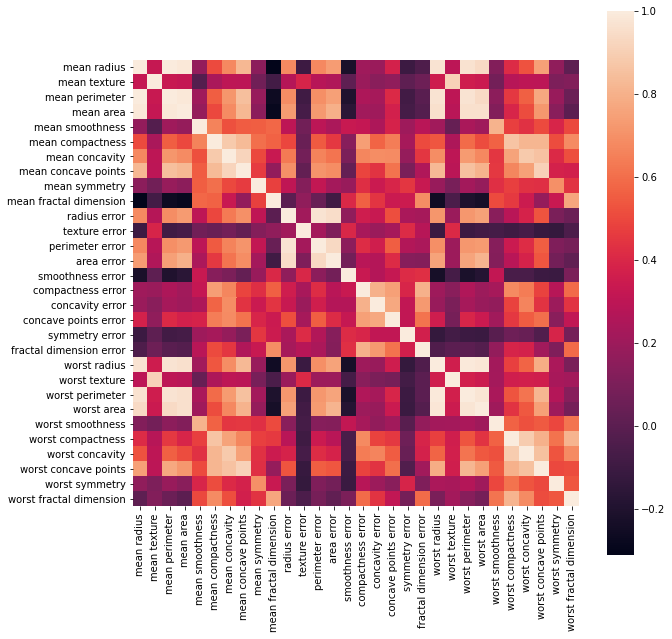

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(X.corr(), square=True)
plt.show()

In [ ]:
pd.Series(y).value_counts()

1    357
0    212
dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
len(y_test), len(y_train)

(114, 455)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight = 'balanced')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.93      0.92      0.92        72

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



### Over-sampling, Under-sampling

Существуют две стратегии ресэмплинга данных:
* добавить данных в меньший класс (oversampling)
* удалить данные из большего класса (undersampling)


![dssmall](https://habrastorage.org/getpro/habr/post_images/ef1/7fd/7b5/ef17fd7b511aa0ae67d398b3205068b8.png)

### Under-sampling

#### TomekLinks

Пусть примеры $E_i$ и $E_j$ принадлежат к различным классам, $d(Ei,Ej)$ – расстояние между указанными примерами. Пара $(Ei,Ej)$ называется связью Томека, если не найдется ни одного примера $E_l$ такого, что будет справедлива совокупность неравенств:

$$\begin{cases}
{d(E_i, E_l)< d(E_i, E_j)}\\
{d(E_j, E_l)< d(E_i, E_j)}
\end{cases}
$$

Согласно данному подходу, все мажоритарные записи, входящие в связи Томека, должны быть удалены из набора данных. Этот способ хорошо удаляет записи, которые можно рассматривать в качестве «зашумляющих».


![dssmall](https://habrastorage.org/getpro/habr/post_images/39c/0f9/4cb/39c0f94cbe7ea3162713d0b00fac912b.png)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
from imblearn.under_sampling import TomekLinks

augm = TomekLinks(sampling_strategy='majority')
X_train_augm, y_train_augm = augm.fit_resample(np.array(X_train), np.array(y_train))

In [ ]:
pd.Series(y_train_augm).value_counts()

1    279
0    170
dtype: int64

In [ ]:
clf = LogisticRegression(class_weight = 'balanced')

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train_augm, y_train_augm)

predictions = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.93      0.92      0.92        72

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



### Oversamplitng

#### SMOTE ADASYN

![](https://hsto.org/getpro/habr/post_images/c57/e7e/f4f/c57e7ef4f8711ad2eda881651a027867.png)

Эта стратегия основана на идее генерации некоторого количества искусственных примеров, которые были бы «похожи» на имеющиеся в миноритарном классе, но при этом не дублировали их. Для создания новой записи находят разность $$d = X_b – X_a$$, где $X_a$,$X_b$ – векторы признаков «соседних» примеров $a$ и $b$ из миноритарного класса. Их находят, используя алгоритм ближайшего соседа (KNN). В данном случае необходимо и достаточно для примера $b$ получить набор из $k$ соседей, из которого в дальнейшем будет выбрана запись $b$. Остальные шаги алгоритма KNN не требуются.

Далее из $d$ путем умножения каждого его элемента на случайное число в интервале (0, 1) получают $\widehat{d}$. Вектор признаков нового примера вычисляется путем сложения $X_a$ и $\widehat{d}$. Алгоритм SMOTE позволяет задавать количество записей, которое необходимо искусственно сгенерировать. Степень сходства примеров $a$ и $b$ можно регулировать путем изменения значения $k$ (числа ближайших соседей). На рисунке схематично изображено то, как в двумерном пространстве признаков могут располагаться искусственно сгенерированные примеры.

![dssmall](https://basegroup.ru/sites/default/files/article_img/smote.gif)

Данный подход имеет недостаток в том, что «вслепую» увеличивает плотность примерами в области слабо представленного класса. В случае, если миноритарные примеры равномерно распределены среди мажоритарных и имеют низкую плотность, алгоритм SMOTE только сильнее перемешает классы.

![dssmall](https://basegroup.ru/sites/default/files/article_img/smote_overgeneralization.gif)

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

augm = ADASYN()
X_train_augm, y_train_augm = augm.fit_resample(np.array(X_train), np.array(y_train))

In [ ]:
pd.Series(y_train).value_counts()

1    285
0    170
dtype: int64

In [ ]:
pd.Series(y_train_augm).value_counts()

1    285
0    281
dtype: int64

In [ ]:
clf = LogisticRegression()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train_augm, y_train_augm)

predictions = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.94      0.92      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



На основе https://www.kaggle.com/jessicali9530/kuc-hackathon-winter-2018

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tixonsit/mmdad_materials/master/drugsComTest_raw.csv')

In [ ]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [ ]:
del df['uniqueID']

In [ ]:
del df['date']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   drugName     53766 non-null  object
 1   condition    53471 non-null  object
 2   review       53766 non-null  object
 3   rating       53766 non-null  int64 
 4   usefulCount  53766 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.1+ MB


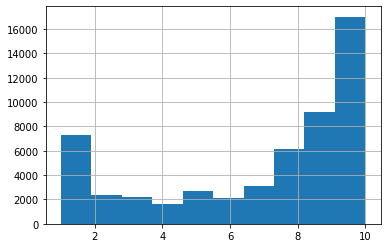

In [ ]:
df['rating'].hist()

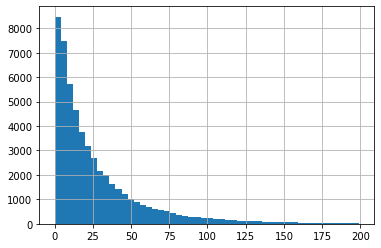

In [ ]:
df['usefulCount'][df['usefulCount'] < 200].hist(bins = 50)

In [ ]:
len(df)

53766

# Пайплайн обработки

## Загрузка данных

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tixonsit/mmdad_materials/master/datasets_33180_43520_heart%20(1).csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
len(df)

303

In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

## Полиномиальные признаки

In [ ]:
# нормализация
def normalize(df, df_type = 'train', mean = None, std = None):
    if df_type == 'train':
        X_train = df.drop(columns=['target']).values
        y_train = df['target'].values

        mean = X_train.mean(axis=0)
        std = X_train.std(axis=0)

        X_train = (X_train - mean)/std

        return X_train, y_train, mean, std
    else:
        X_train = df.drop(columns=['target']).values
        y_train = df['target'].values

        return (X_train - mean)/std, y_train, mean, std

In [ ]:
train_size = 0.8

# перемешка
df = df.sample(frac=1).reset_index(drop=True)

X_train, y_train, mean, std = normalize(df[:int(train_size*len(df))])
X_test, y_test, mean, std = normalize(df[int(train_size*len(df)):], df_type = 'test', mean = mean, std = std)

In [ ]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [ ]:
y_train.shape, y_test.shape

((242,), (61,))

In [ ]:
X_train

array([[ 0.86832466, -1.61614984,  1.00712289, ..., -0.71369147,
         0.30612609,  1.07105508],
       [ 1.09342865, -1.61614984, -0.93489894, ..., -0.71369147,
         1.32095503, -0.54891573],
       [-2.17057911,  0.61875451,  0.03611198, ...,  0.93119744,
        -0.70870286, -0.54891573],
       ...,
       [-0.59485123, -1.61614984, -0.93489894, ...,  0.93119744,
        -0.70870286, -0.54891573],
       [-0.9325072 ,  0.61875451, -0.93489894, ...,  0.93119744,
        -0.70870286,  1.07105508],
       [ 0.3055647 , -1.61614984, -0.93489894, ..., -0.71369147,
        -0.70870286,  1.07105508]])

## Создание полиномиальных

In [ ]:
def create_polinomial(X, degree = 2):
    return PolynomialFeatures(degree).fit_transform(X)

In [ ]:
X_train = create_polinomial(X_train, 2)
X_test = create_polinomial(X_test, 2)

In [ ]:
X_train.shape, X_test.shape

((242, 105), (61, 105))

## Аугментация

In [ ]:
def oversample_data(X, y):
    return ADASYN(sampling_strategy='minority').fit_resample(np.array(X), np.array(y))

In [ ]:
def undersample_data(X, y):
    return TomekLinks().fit_resample(np.array(X), np.array(y))

In [ ]:
def augment_data(X, y):
    try:
        X, y = oversample_data(X, y)
    except:
        pass
    # try:
    #     X, y = undersample_data(X, y)
    # except:
    #     pass
    return X, y

In [ ]:
X_train, y_train = augment_data(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape

((242, 105), (242,))

## Алгоритмы

In [ ]:
from sklearn.svm import SVC

In [ ]:
alg = SVC()

grid = {'C': np.array(np.linspace(-5, 5, 10), dtype='float'),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1, scoring = 'f1')
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.70934343 0.74472683 0.77824243 0.81681088
 0.72095359 0.75839161 0.80719978 0.81140158 0.70051792 0.76039298
 0.76818026 0.80700339 0.70806509 0.76535544 0.77160114 0.78938819
 0.70806509 0.75719045 0.7698715  0.78125589]
  category=UserWarning


({'C': 0.5555555555555554, 'kernel': 'sigmoid'}, 0.8168108808327279)

In [ ]:
alg = SVC(C =  0.55, kernel = 'sigmoid')
alg.fit(X_train, y_train)
preds = alg.predict(X_test)

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        26
           1       0.85      0.94      0.89        35

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



## Оценка репрезентативности данных

In [ ]:
results = []

for i in range(20):
    train_size = 0.8
    # перемешка
    df = df.sample(frac=1).reset_index(drop=True)
    # нормализация
    X_train, y_train, mean, std = normalize(df[:int(train_size*len(df))])
    X_test, y_test, mean, std = normalize(df[int(train_size*len(df)):], df_type = 'test', mean = mean, std = std)
    # полиномиальные
    X_train = create_polinomial(X_train, 2)
    X_test = create_polinomial(X_test, 2)  
    # аугментация
    X_train, y_train = augment_data(X_train, y_train)
    # алгоритмы
    alg = SVC()
    grid = {'C': np.array(np.linspace(-5, 5, 10), dtype='float'),
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            }

    gs = GridSearchCV(alg, grid, n_jobs = -1, scoring = 'f1')
    gs.fit(X_train, y_train)
    
    print(gs.best_score_)
    results.append(gs.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.76281513 0.73544069 0.78995663 0.83595948
 0.74075425 0.74534512 0.81819038 0.8209394  0.74322179 0.74708277
 0.80035932 0.79717342 0.74322179 0.75569986 0.79422561 0.80236812
 0.74322179 0.75635386 0.80657374 0.8006256 ]
  category=UserWarning


0.8359594836949658


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.76355662 0.73848769 0.83052246 0.81981964
 0.75073263 0.75083916 0.82896992 0.79557645 0.74730406 0.76336996
 0.82395031 0.79096503 0.74730406 0.76780702 0.81461698 0.78701092
 0.74730406 0.77959345 0.80251996 0.77715074]
  category=UserWarning


0.8305224557166844


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.8107013  0.72298146 0.73823343 0.75911848
 0.80726839 0.74468883 0.78237072 0.76424872 0.80929196 0.76337625
 0.81546725 0.76132827 0.80929196 0.77155215 0.82188327 0.76921388
 0.80929196 0.77488498 0.81617827 0.74554633]
  category=UserWarning


0.8218832739587457


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.74736033 0.73099145 0.80025675 0.84318124
 0.72330958 0.75120752 0.81946174 0.83449157 0.72330958 0.7571862
 0.81844586 0.80356992 0.72330958 0.75721124 0.81913832 0.78542435
 0.72330958 0.75746109 0.8063629  0.80560184]
  category=UserWarning


0.8431812385573346


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.81772565 0.72849038 0.74734766 0.79376889
 0.8028457  0.75509354 0.79077075 0.8064577  0.8028457  0.76487529
 0.81554073 0.76010571 0.8028457  0.77429346 0.83795264 0.74399728
 0.8028457  0.78102013 0.83379679 0.74203529]
  category=UserWarning


0.8379526355996945


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.77548358 0.71942807 0.7807663  0.80460032
 0.76611259 0.7518725  0.78518519 0.75749329 0.75634953 0.74312091
 0.7920848  0.75229483 0.75402272 0.74241822 0.7729797  0.760867
 0.75402272 0.74222088 0.77033811 0.76175614]
  category=UserWarning


0.8046003150576224


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.79933865 0.74017056 0.7788091  0.80139594
 0.79337264 0.74337071 0.78940979 0.76544229 0.78880121 0.76045555
 0.79173052 0.75060984 0.78880121 0.7612336  0.78643085 0.73425989
 0.78880121 0.77068312 0.78538531 0.74885024]
  category=UserWarning


0.8013959394902781


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.74778179 0.72554593 0.76884958 0.83399988
 0.73045799 0.74161139 0.78705318 0.79225419 0.72721551 0.74697011
 0.78731097 0.77261231 0.72554884 0.74933982 0.78230061 0.78322662
 0.72554884 0.75693952 0.78836539 0.77790061]
  category=UserWarning


0.8339998758280567


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.77148449 0.71010385 0.78278405 0.82039831
 0.73723206 0.72576209 0.80075018 0.78617189 0.73723206 0.72296579
 0.78603387 0.78147567 0.73723206 0.73321873 0.77990402 0.75627329
 0.73723206 0.74429648 0.78131109 0.76587987]
  category=UserWarning


0.820398310928687


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.78308233 0.71966693 0.77822923 0.82387397
 0.78841751 0.75481475 0.79006767 0.8204975  0.78841751 0.77307786
 0.78605612 0.81702845 0.78841751 0.76363015 0.79615238 0.81063152
 0.78841751 0.76716155 0.80026074 0.79590906]
  category=UserWarning


0.8238739745538709


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.77545958 0.73741261 0.79770631 0.78106465
 0.7908466  0.7465661  0.80092052 0.79006519 0.7908466  0.73765349
 0.79091588 0.74866269 0.7908466  0.75132583 0.7989739  0.74093199
 0.7908466  0.75339623 0.79737374 0.74736238]
  category=UserWarning


0.800920517348624


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.77114846 0.72388892 0.81353804 0.85098811
 0.75991306 0.75201507 0.8254451  0.85469355 0.75991306 0.75456838
 0.83830116 0.82145225 0.75991306 0.76983864 0.84407739 0.80163901
 0.75991306 0.77359163 0.84133882 0.790014  ]
  category=UserWarning


0.854693545625749


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.75255079 0.7229225  0.78262231 0.83705322
 0.74857196 0.7483871  0.80365502 0.79184275 0.74857196 0.76396201
 0.79792068 0.7734558  0.74857196 0.77624222 0.79760352 0.74144205
 0.74857196 0.77198157 0.79895222 0.73652841]
  category=UserWarning


0.8370532241934887


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.80063178 0.73824727 0.79900597 0.80128612
 0.79658744 0.75876488 0.83715176 0.77295403 0.79658744 0.76679055
 0.82972546 0.79007866 0.79658744 0.76092092 0.81488122 0.77050207
 0.79658744 0.76837317 0.79895471 0.75772096]
  category=UserWarning


0.8371517586695791


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.75514859 0.72847235 0.78692519 0.80689487
 0.78020408 0.75145351 0.8217821  0.76958872 0.77835223 0.76106708
 0.80245955 0.77878473 0.77835223 0.76306828 0.79071634 0.76638223
 0.77835223 0.76088037 0.78651305 0.78262157]
  category=UserWarning


0.8217820996713143


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.81302592 0.737741   0.8101051  0.84374847
 0.80478661 0.7684162  0.82817481 0.78883233 0.80478661 0.782275
 0.840574   0.75949022 0.80478661 0.78829244 0.84044306 0.74703876
 0.80478661 0.80378847 0.81390577 0.75643865]
  category=UserWarning


0.8437484707609493


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.74708853 0.7286785  0.81936197 0.82806065
 0.75537018 0.75728368 0.82815255 0.80927065 0.75796758 0.75059137
 0.81023569 0.80083565 0.75796758 0.7537105  0.81023569 0.81519452
 0.75796758 0.76322319 0.80290557 0.79446587]
  category=UserWarning


0.8281525458668316


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.77580919 0.7367765  0.81471849 0.81364541
 0.76692949 0.76622103 0.82663055 0.82066942 0.76692949 0.76574081
 0.83198076 0.83268986 0.76692949 0.7815986  0.84694063 0.81710182
 0.76692949 0.794877   0.84725652 0.80593746]
  category=UserWarning


0.8472565170678379


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.74809548 0.72602632 0.75578226 0.8054086
 0.74611518 0.75648693 0.79312652 0.77700668 0.74297435 0.75519794
 0.79005809 0.79195353 0.74297435 0.76335354 0.78505668 0.76052381
 0.74297435 0.76523165 0.77372727 0.74897098]
  category=UserWarning


0.8054085998612704
0.8320918132306213


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.72516123 0.72189177 0.80682079 0.83209181
 0.74219826 0.74630132 0.77539234 0.81862774 0.74219826 0.7519461
 0.78189974 0.78178588 0.74219826 0.76406373 0.79164631 0.80697142
 0.74219826 0.77051612 0.79053226 0.79956266]
  category=UserWarning


{'boxes': [<matplotlib.lines.Line2D at 0x7f44b3534e48>],
 'caps': [<matplotlib.lines.Line2D at 0x7f44b34d12b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f44b2c53358>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f44b34d1978>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f44b34d1e80>,
  <matplotlib.lines.Line2D at 0x7f44b34d1470>]}

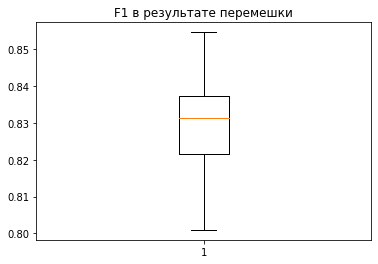

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('F1 в результате перемешки')
ax1.boxplot(results)

## Кривые обучения

In [ ]:
# отобразим данные и средние значения кривых между ними (так как берем k фолдов)
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor=lines[0].get_color(), alpha=0.2)

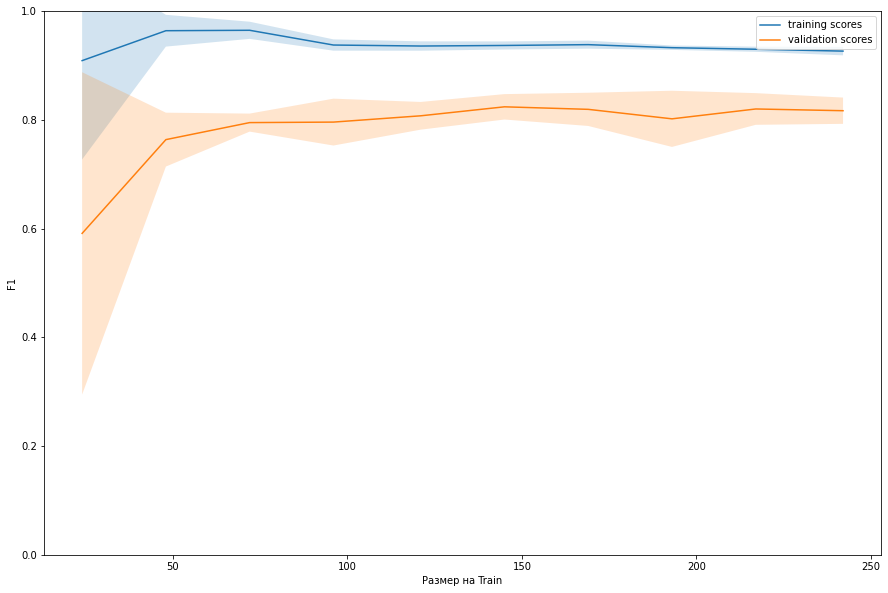

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pipe = Pipeline([('scaler', StandardScaler()), # нормализуем
                 ('poly', PolynomialFeatures(degree=3)), # создадим полиномиальных признаков (степень 2)
                 ('alg', SVC())]) # svm

N_train, val_train, val_test = learning_curve(pipe,
                                              df.drop(columns=['target']).values, # X
                                              df['target'].values, # y
                                              train_sizes = np.linspace(0.1, 1, 10), # переменный размер обучающей выборки
                                              cv=5, # 5 фолдов кросс вал
                                              scoring='f1') # R2

from matplotlib.pyplot import figure, ylim
figure(figsize=(15, 10))

ylim(0, 1)
plot_with_err(N_train, val_train, label='training scores')
plot_with_err(N_train, val_test, label='validation scores')
plt.xlabel('Размер на Train')
plt.ylabel('F1')
plt.legend()